In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split


import glob
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt




import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Read the csv file into a pandas DataFrame

filelist = glob.glob('Predicted_Resources/*.csv')
filelist


['Actual_Resources\\expedition_everest.csv',
 'Actual_Resources\\rock_n_rollercoaster.csv',
 'Actual_Resources\\soarin.csv',
 'Actual_Resources\\splash_mountain.csv']

In [7]:
data = {}

for filename in filelist:
    data[filename[10:-4]] = pd.read_csv(filename)
    
data    

{'ources\\expedition_everest':        SPOSTMIN  DAYOFWEEK  DAYOFYEAR  MONTHOFYEAR    YEAR  \
 0     40.268817        5.0        0.0          1.0  2015.0   
 1     34.198113        6.0        1.0          1.0  2015.0   
 2     29.793814        7.0        2.0          1.0  2015.0   
 3     23.850000        1.0        3.0          1.0  2015.0   
 4     26.956522        2.0        4.0          1.0  2015.0   
 5     26.666667        3.0        5.0          1.0  2015.0   
 6     33.283582        4.0        6.0          1.0  2015.0   
 7     30.846154        5.0        7.0          1.0  2015.0   
 8     22.631579        6.0        8.0          1.0  2015.0   
 9     24.340278        7.0        9.0          1.0  2015.0   
 10    16.127451        1.0       10.0          1.0  2015.0   
 11    11.936937        2.0       11.0          1.0  2015.0   
 12     8.137255        3.0       12.0          1.0  2015.0   
 13    15.891089        5.0       14.0          1.0  2015.0   
 14    22.809524        6

In [10]:
seasons = []
for season in list(data["ources\\splash_mountain"]["SEASON"].values):
    if season not in seasons:
        seasons.append(season)
seasons

['CHRISTMAS PEAK',
 'CHRISTMAS',
 'WINTER',
 'PRESIDENTS WEEK',
 'SPRING',
 'EASTER',
 'MEMORIAL DAY',
 'SUMMER BREAK',
 'JULY 4TH',
 'SEPTEMBER LOW',
 'FALL',
 'COLUMBUS DAY',
 'HALLOWEEN',
 'JERSEY WEEK',
 'THANKSGIVING',
 'MARTIN LUTHER KING JUNIOR DAY',
 'MARDI GRAS']

In [12]:
len(data["ources\\splash_mountain"].columns)
len(data["ources\\soarin"].columns)

139

In [15]:
data["ources\\soarin"]["SPOSTMIN"].values

array([89.81481481, 82.38970588, 55.9375    , ..., 27.54310345,
       28.10344828, 31.77536232])

In [16]:
data["ources\\soarin"].loc[:, data["ources\\soarin"].columns != 'SPOSTMIN'].values

array([[5.0, 0.0, 1.0, ..., 0.0, 3.0, 0.0],
       [6.0, 1.0, 1.0, ..., 0.0, 3.0, 0.0],
       [3.0, 5.0, 1.0, ..., 0.0, 1.0, 0.0],
       ...,
       [1.0, 209.0, 7.0, ..., 1.0, 2.0, 2.0],
       [2.0, 210.0, 7.0, ..., 1.0, 2.0, 2.0],
       [3.0, 211.0, 7.0, ..., 1.0, 2.0, 2.0]], dtype=object)

In [17]:
def convertTimetoInt(time):
    time = time.replace(':', '')
    return((int(time[0]) + float(time[1])/60))
for x in data: 
    for i in data[x].columns[data[x].dtypes == object]:
        if ':' in data[x][i][0]:
            data[x][i] = data[x][i].map(convertTimetoInt)
        elif '%' in data[x][i][0]:
            data[x][i] = data[x][i].map(lambda x: x.strip('%'))
        elif 'SEASON' in i:
            #temp[i] = to_categorical(pd.factorize(temp[i])[0])
            data[x][i] = pd.factorize(data[x][i])[0]
        elif ' ' in data[x][i][0]:
            data[x][i] = pd.factorize(data[x][i])[0]

In [18]:
data[x]

SPOSTMIN  DAYOFWEEK  DAYOFYEAR  MONTHOFYEAR    YEAR  SEASON  HOLIDAYPX  \
0    28.156028        5.0        0.0          1.0  2015.0       0        0.0   
1    44.014085        6.0        1.0          1.0  2015.0       1        2.0   
2    43.198529        7.0        2.0          1.0  2015.0       1        3.0   
3    30.992063        1.0        3.0          1.0  2015.0       1        4.0   
4    16.721311        1.0       31.0          2.0  2015.0       2        0.0   
5    14.233333        3.0       33.0          2.0  2015.0       2        3.0   
6    13.129032        4.0       34.0          2.0  2015.0       2        4.0   
7     5.680000        5.0       35.0          2.0  2015.0       2        5.0   
8    20.843023        6.0       36.0          2.0  2015.0       2        6.0   
9    18.341709        7.0       37.0          2.0  2015.0       2        7.0   
10   19.365079        1.0       38.0          2.0  2015.0       2        7.0   
11    9.594595        2.0       39.0          2.0  2015.0       2        6.0   
12   13.545455        4.0       41.0          2.0  2015.0       2        4.0   
13   21.949686        5.0       42.0          2.0  2015.0       3        3.0   
14   16.016043        6.0       43.0          2.0  2015.0       3        2.0   
15   34.338624        2.0       46.0          2.0  2015.0       3        0.0   
16   18.316327        4.0       48.0          2.0  2015.0       3        0.0   
17    9.587912        6.0       50.0          2.0  2015.0       3        3.0   
18   20.386598        7.0       51.0          2.0  2015.0       3        4.0   
19   28.502825        1.0       52.0          2.0  2015.0       3        5.0   
20   25.696970        2.0       53.0          2.0  2015.0       2        6.0   
21   17.329545        3.0       54.0          2.0  2015.0       2        7.0   
22   13.478261        4.0       55.0          2.0  2015.0       2        8.0   
23   10.671141        5.0       56.0          2.0  2015.0       2        9.0   
24    5.638298        6.0       57.0          2.0  2015.0       2       10.0   
25    7.670455        7.0       58.0          2.0  2015.0       2       11.0   
26   25.789474        1.0       59.0          3.0  2015.0       4       12.0   
27   27.542373        2.0       60.0          3.0  2015.0       4       13.0   
28   26.506410        3.0       61.0          3.0  2015.0       4       14.0   
29   16.554878        4.0       62.0          3.0  2015.0       4       14.0   
..         ...        ...        ...          ...     ...     ...        ...   
941  67.083333        6.0      172.0          6.0  2018.0       4        6.0   
942  67.366071        7.0      173.0          6.0  2018.0       4        7.0   
943  59.072581        1.0      174.0          6.0  2018.0       4        8.0   
944  79.854015        2.0      175.0          6.0  2018.0       4        9.0   
945  72.703704        3.0      176.0          6.0  2018.0       4        9.0   
946  73.795620        4.0      177.0          6.0  2018.0       4        8.0   
947  63.876404        6.0      179.0          6.0  2018.0       4        6.0   
948  38.811475        7.0      180.0          6.0  2018.0       4        5.0   
949  52.796610        1.0      181.0          7.0  2018.0       7        4.0   
950  69.210526        3.0      183.0          7.0  2018.0       8        2.0   
951  70.887097        4.0      184.0          7.0  2018.0       8        0.0   
952  70.275591        5.0      185.0          7.0  2018.0       8        2.0   
953  56.296296        6.0      186.0          7.0  2018.0       8        3.0   
954  45.625000        7.0      187.0          7.0  2018.0       7        4.0   
955  47.892157        1.0      188.0          7.0  2018.0       7        5.0   
956  70.595238        2.0      189.0          7.0  2018.0       7        6.0   
957  69.205607        3.0      190.0          7.0  2018.0       7        7.0   
958  61.386555        5.0      192.0          7.0  2018.0       7        9.0   
959  6

In [19]:
for x in data:
    target = data[x]["SPOSTMIN"].values
    target = target.round()
    real_data = data[x].loc[:, data[x].columns != 'SPOSTMIN'].values
    
    rf = RandomForestClassifier(n_estimators=200)
    rf = rf.fit(real_data, target)
    print(x)
    print(rf.score(real_data, target))

    importances = rf.feature_importances_

ources\expedition_everest
1.0
ources\rock_n_rollercoaster
1.0
ources\soarin
1.0
ources\splash_mountain
1.0


In [20]:
variables = {}

for x in data:
    print(x)
    variables[x] = pd.DataFrame(sorted(zip(rf.feature_importances_, list(data[x].columns)), reverse=True))

ources\expedition_everest
ources\rock_n_rollercoaster
ources\soarin
ources\splash_mountain


In [21]:
variables["ources\\expedition_everest"].head(60)

0                     1
0   0.028947               WDWrace
1   0.027317            WDWMAXTEMP
2   0.025643            WDWMINTEMP
3   0.025163       PARTYSEASON_WDW
4   0.022453             DAYOFWEEK
5   0.021892                SEASON
6   0.021089       WEATHER_WDWHIGH
7   0.020994       WDWMINTEMP_mean
8   0.016855               AKevent
9   0.016797        WEATHER_WDWLOW
10  0.015761              MKEMHEVE
11  0.015462    inSession_sqrt_WDW
12  0.015457             inSession
13  0.014201              AKEMHEVE
14  0.013981        MKHOURSEMHYEST
15  0.013955         inSession_dlr
16  0.013884              SPOSTMIN
17  0.013742         inSession_wdw
18  0.013313   inSession_Drive2_FL
19  0.013235        AKHOURSEMHYEST
20  0.013226            AKHOURSEMH
21  0.012975  inSession_Enrollment
22  0.012548            MKHOURSEMH
23  0.012507             HSEMHETOM
24  0.012199    inSession_sqrt_DLR
25  0.012051        HSHOURSEMHYEST
26  0.011848   inSession_Drive1_FL
27  0.011735    inSession_Nothwest
28  0.011638               MKCLOSE
29  0.011424            MKCLOSETOM
30  0.011400       CapacityLost_AK
31  0.011064     WEATHER_WDWPRECIP
32  0.010915  inSession_California
33  0.010825      INSESSION_PLANES
34  0.010798           MKCLOSEYEST
35  0.010705  inSession_Mardi_Gras
36  0.010651            HSHOURSEMH
37  0.010303             MKOPENTOM
38  0.009872            AKCLOSETOM
39  0.009620           AKCLOSEYEST
40  0.009518               AKCLOSE
41  0.009389  inSession_Central_FL
42  0.009316            MKOPENYEST
43  0.008927     inSession_Florida
44  0.008832       CapacityLost_MK
45  0.008723        EPHOURSEMHYEST
46  0.008340    CapacityLostWGT_EP
47  0.008256    CapacityLostWGT_MK
48  0.008184       CapacityLost_EP
49  0.008162            EPHOURSEMH
50  0.008109                  YEAR
51  0.008051             EPEMHETOM
52  0.008051                MKOPEN
53  0.007961            HSCLOSETOM
54  0.007613             DAYOFYEAR
55  0.007509               HSCLOSE
56  0.007468           HSCLOSEYEST
57  0.007349    inSession_Drive_CA
58  0.007246       CapacityLost_HS
59  0.006990                AKOPEN

In [22]:
variables["ources\\rock_n_rollercoaster"].head(60)

0                     1
0   0.028947               WDWrace
1   0.027317            WDWMAXTEMP
2   0.025643            WDWMINTEMP
3   0.025163       PARTYSEASON_WDW
4   0.022453             DAYOFWEEK
5   0.021892                SEASON
6   0.021089       WEATHER_WDWHIGH
7   0.020994       WDWMINTEMP_mean
8   0.016855               AKevent
9   0.016797        WEATHER_WDWLOW
10  0.015761              MKEMHEVE
11  0.015462    inSession_sqrt_WDW
12  0.015457             inSession
13  0.014201              AKEMHEVE
14  0.013981        MKHOURSEMHYEST
15  0.013955         inSession_dlr
16  0.013884              SPOSTMIN
17  0.013742         inSession_wdw
18  0.013313   inSession_Drive2_FL
19  0.013235        AKHOURSEMHYEST
20  0.013226            AKHOURSEMH
21  0.012975  inSession_Enrollment
22  0.012548            MKHOURSEMH
23  0.012507             HSEMHETOM
24  0.012199    inSession_sqrt_DLR
25  0.012051        HSHOURSEMHYEST
26  0.011848   inSession_Drive1_FL
27  0.011735    inSession_Nothwest
28  0.011638               MKCLOSE
29  0.011424            MKCLOSETOM
30  0.011400       CapacityLost_AK
31  0.011064     WEATHER_WDWPRECIP
32  0.010915  inSession_California
33  0.010825      INSESSION_PLANES
34  0.010798           MKCLOSEYEST
35  0.010705  inSession_Mardi_Gras
36  0.010651            HSHOURSEMH
37  0.010303             MKOPENTOM
38  0.009872            AKCLOSETOM
39  0.009620           AKCLOSEYEST
40  0.009518               AKCLOSE
41  0.009389  inSession_Central_FL
42  0.009316            MKOPENYEST
43  0.008927     inSession_Florida
44  0.008832       CapacityLost_MK
45  0.008723        EPHOURSEMHYEST
46  0.008340    CapacityLostWGT_EP
47  0.008256    CapacityLostWGT_MK
48  0.008184       CapacityLost_EP
49  0.008162            EPHOURSEMH
50  0.008109                  YEAR
51  0.008051             EPEMHETOM
52  0.008051                MKOPEN
53  0.007961            HSCLOSETOM
54  0.007613             DAYOFYEAR
55  0.007509               HSCLOSE
56  0.007468           HSCLOSEYEST
57  0.007349    inSession_Drive_CA
58  0.007246       CapacityLost_HS
59  0.006990                AKOPEN

In [23]:
variables["ources\\soarin"].head(60)

0                     1
0   0.028947               WDWrace
1   0.027317            WDWMAXTEMP
2   0.025643            WDWMINTEMP
3   0.025163       PARTYSEASON_WDW
4   0.022453             DAYOFWEEK
5   0.021892                SEASON
6   0.021089       WEATHER_WDWHIGH
7   0.020994       WDWMINTEMP_mean
8   0.016855               AKevent
9   0.016797        WEATHER_WDWLOW
10  0.015761              MKEMHEVE
11  0.015462    inSession_sqrt_WDW
12  0.015457             inSession
13  0.014201              AKEMHEVE
14  0.013981        MKHOURSEMHYEST
15  0.013955         inSession_dlr
16  0.013884              SPOSTMIN
17  0.013742         inSession_wdw
18  0.013313   inSession_Drive2_FL
19  0.013235        AKHOURSEMHYEST
20  0.013226            AKHOURSEMH
21  0.012975  inSession_Enrollment
22  0.012548            MKHOURSEMH
23  0.012507             HSEMHETOM
24  0.012199    inSession_sqrt_DLR
25  0.012051        HSHOURSEMHYEST
26  0.011848   inSession_Drive1_FL
27  0.011735    inSession_Nothwest
28  0.011638               MKCLOSE
29  0.011424            MKCLOSETOM
30  0.011400       CapacityLost_AK
31  0.011064     WEATHER_WDWPRECIP
32  0.010915  inSession_California
33  0.010825      INSESSION_PLANES
34  0.010798           MKCLOSEYEST
35  0.010705  inSession_Mardi_Gras
36  0.010651            HSHOURSEMH
37  0.010303             MKOPENTOM
38  0.009872            AKCLOSETOM
39  0.009620           AKCLOSEYEST
40  0.009518               AKCLOSE
41  0.009389  inSession_Central_FL
42  0.009316            MKOPENYEST
43  0.008927     inSession_Florida
44  0.008832       CapacityLost_MK
45  0.008723        EPHOURSEMHYEST
46  0.008340    CapacityLostWGT_EP
47  0.008256    CapacityLostWGT_MK
48  0.008184       CapacityLost_EP
49  0.008162            EPHOURSEMH
50  0.008109                  YEAR
51  0.008051             EPEMHETOM
52  0.008051                MKOPEN
53  0.007961            HSCLOSETOM
54  0.007613             DAYOFYEAR
55  0.007509               HSCLOSE
56  0.007468           HSCLOSEYEST
57  0.007349    inSession_Drive_CA
58  0.007246       CapacityLost_HS
59  0.006990                AKOPEN

In [24]:
variables["ources\\splash_mountain"].head(60)

0                     1
0   0.028947               WDWrace
1   0.027317            WDWMAXTEMP
2   0.025643            WDWMINTEMP
3   0.025163       PARTYSEASON_WDW
4   0.022453             DAYOFWEEK
5   0.021892                SEASON
6   0.021089       WEATHER_WDWHIGH
7   0.020994       WDWMINTEMP_mean
8   0.016855               AKevent
9   0.016797        WEATHER_WDWLOW
10  0.015761              MKEMHEVE
11  0.015462    inSession_sqrt_WDW
12  0.015457             inSession
13  0.014201              AKEMHEVE
14  0.013981        MKHOURSEMHYEST
15  0.013955         inSession_dlr
16  0.013884              SPOSTMIN
17  0.013742         inSession_wdw
18  0.013313   inSession_Drive2_FL
19  0.013235        AKHOURSEMHYEST
20  0.013226            AKHOURSEMH
21  0.012975  inSession_Enrollment
22  0.012548            MKHOURSEMH
23  0.012507             HSEMHETOM
24  0.012199    inSession_sqrt_DLR
25  0.012051        HSHOURSEMHYEST
26  0.011848   inSession_Drive1_FL
27  0.011735    inSession_Nothwest
28  0.011638               MKCLOSE
29  0.011424            MKCLOSETOM
30  0.011400       CapacityLost_AK
31  0.011064     WEATHER_WDWPRECIP
32  0.010915  inSession_California
33  0.010825      INSESSION_PLANES
34  0.010798           MKCLOSEYEST
35  0.010705  inSession_Mardi_Gras
36  0.010651            HSHOURSEMH
37  0.010303             MKOPENTOM
38  0.009872            AKCLOSETOM
39  0.009620           AKCLOSEYEST
40  0.009518               AKCLOSE
41  0.009389  inSession_Central_FL
42  0.009316            MKOPENYEST
43  0.008927     inSession_Florida
44  0.008832       CapacityLost_MK
45  0.008723        EPHOURSEMHYEST
46  0.008340    CapacityLostWGT_EP
47  0.008256    CapacityLostWGT_MK
48  0.008184       CapacityLost_EP
49  0.008162            EPHOURSEMH
50  0.008109                  YEAR
51  0.008051             EPEMHETOM
52  0.008051                MKOPEN
53  0.007961            HSCLOSETOM
54  0.007613             DAYOFYEAR
55  0.007509               HSCLOSE
56  0.007468           HSCLOSEYEST
57  0.007349    inSession_Drive_CA
58  0.007246       CapacityLost_HS
59  0.006990                AKOPEN

In [25]:
modelingData = {}
for x in data:
    modelingData[x] = data[x][['SPOSTMIN','WDWMAXTEMP', 'PARTYSEASON_WDW', 'inSession', 'SEASON', 'DAYOFWEEK']]

In [26]:
temp = modelingData["ources\\soarin"]
temp = temp.round({'SPOSTMIN':2})
temp.head()

SPOSTMIN  WDWMAXTEMP  PARTYSEASON_WDW inSession  SEASON  DAYOFWEEK
0     89.81       73.02                0         0       0        5.0
1     82.39       78.00                0         0       1        6.0
2     55.94       77.67                0        86       1        3.0
3     50.53       59.44                0        88       1        5.0
4     48.30       54.89                0        88       1        6.0

In [28]:
target = temp["SPOSTMIN"].values
data = temp.loc[:, temp.columns != 'SPOSTMIN'].values.tolist()

In [29]:
temp.to_csv('testdata_Actual.csv', index = False)

In [30]:
dataset = pd.read_csv('testdata_Actual.csv')
print(dataset.head(5))


   SPOSTMIN  WDWMAXTEMP  PARTYSEASON_WDW  inSession  SEASON  DAYOFWEEK
0     89.81       73.02                0          0       0        5.0
1     82.39       78.00                0          0       1        6.0
2     55.94       77.67                0         86       1        3.0
3     50.53       59.44                0         88       1        5.0
4     48.30       54.89                0         88       1        6.0


In [31]:
##Seasons Dict
# 0 = Christmas Peak
# 1 = Christmas
# 2 = Winter
# 3 = MLK Day
# 4 = Presidents Week
# 5 = Spring
# 6 = Easter
# 7 = Memorial Day
# 8 = July 4th
# 9 = Summer Break
#10 = September Low
#11 = Fall
#12 = Columbus Day
#13 = Halloween
#14 = Jersey Week
#15 = Thanksgiving
#16 = Mardi Gras

df1 = pd.get_dummies(temp['SEASON'])
df1.columns = ['Christmas Peak','Christmas','Winter','MLK day','Presidents Week','Spring', 'Easter','Memorial Day','Independence Day','Summer Break','September Low','Fall','Columbus Day','Halloween','Jersey Week','Thanksgiving','Mardi Gras']
print(df1)

      Christmas Peak  Christmas  Winter  MLK day  Presidents Week  Spring  \
0                  1          0       0        0                0       0   
1                  0          1       0        0                0       0   
2                  0          1       0        0                0       0   
3                  0          1       0        0                0       0   
4                  0          1       0        0                0       0   
5                  0          0       1        0                0       0   
6                  0          0       1        0                0       0   
7                  0          0       1        0                0       0   
8                  0          0       1        0                0       0   
9                  0          0       0        1                0       0   
10                 0          0       0        1                0       0   
11                 0          0       0        1                0       0   

In [32]:
df2 = pd.get_dummies(temp['DAYOFWEEK'])
df2.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday']
print(df2)

      Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
0          0       0        0          0         1       0         0
1          0       0        0          0         0       1         0
2          0       0        1          0         0       0         0
3          0       0        0          0         1       0         0
4          0       0        0          0         0       1         0
5          0       0        0          0         0       0         1
6          0       1        0          0         0       0         0
7          0       0        1          0         0       0         0
8          0       0        0          1         0       0         0
9          0       0        0          0         1       0         0
10         0       0        0          0         0       1         0
11         1       0        0          0         0       0         0
12         0       1        0          0         0       0         0
13         0       0        0     

In [33]:
final = temp.drop(['SEASON','DAYOFWEEK'], axis=1 )
final.tail()

SPOSTMIN  WDWMAXTEMP  PARTYSEASON_WDW inSession
1006     29.87       90.21                0        16
1007     30.57       91.31                0        16
1008     27.54       90.08                0        21
1009     28.10       85.95                0        21
1010     31.78       88.40                0        22

In [34]:
final.tail()

SPOSTMIN  WDWMAXTEMP  PARTYSEASON_WDW inSession
1006     29.87       90.21                0        16
1007     30.57       91.31                0        16
1008     27.54       90.08                0        21
1009     28.10       85.95                0        21
1010     31.78       88.40                0        22

In [35]:
first_final = final.join(df1)
first_final.tail()

SPOSTMIN  WDWMAXTEMP  PARTYSEASON_WDW inSession  Christmas Peak  \
1006     29.87       90.21                0        16               0   
1007     30.57       91.31                0        16               0   
1008     27.54       90.08                0        21               0   
1009     28.10       85.95                0        21               0   
1010     31.78       88.40                0        22               0   

      Christmas  Winter  MLK day  Presidents Week  Spring     ...      \
1006          0       0        0                0       0     ...       
1007          0       0        0                0       0     ...       
1008          0       0        0                0       0     ...       
1009          0       0        0                0       0     ...       
1010          0       0        0                0       0     ...       

      Memorial Day  Independence Day  Summer Break  September Low  Fall  \
1006             0                 0             1              0     0   
1007             0                 0             1              0     0   
1008             0                 0             1              0     0   
1009             0                 0             1              0     0   
1010             0                 0             1              0     0   

      Columbus Day  Halloween  Jersey Week  Thanksgiving  Mardi Gras  
1006             0          0            0             0           0  
1007             0          0            0             0           0  
1008             0          0            0             0           0  
1009             0          0            0             0           0  
1010             0          0            0             0           0  

[5 rows x 21 columns]

In [36]:
final_df = first_final.join(df2)
final_df.tail()

SPOSTMIN  WDWMAXTEMP  PARTYSEASON_WDW inSession  Christmas Peak  \
1006     29.87       90.21                0        16               0   
1007     30.57       91.31                0        16               0   
1008     27.54       90.08                0        21               0   
1009     28.10       85.95                0        21               0   
1010     31.78       88.40                0        22               0   

      Christmas  Winter  MLK day  Presidents Week  Spring    ...     \
1006          0       0        0                0       0    ...      
1007          0       0        0                0       0    ...      
1008          0       0        0                0       0    ...      
1009          0       0        0                0       0    ...      
1010          0       0        0                0       0    ...      

      Jersey Week  Thanksgiving  Mardi Gras  Sunday  Monday  Tuesday  \
1006            0             0           0       0       0        0   
1007            0             0           0       0       0        0   
1008            0             0           0       1       0        0   
1009            0             0           0       0       1        0   
1010            0             0           0       0       0        1   

      Wednesday  Thursday  Friday  Saturday  
1006          0         0       1         0  
1007          0         0       0         1  
1008          0         0       0         0  
1009          0         0       0         0  
1010          0         0       0         0  

[5 rows x 28 columns]

In [37]:
final_df.columns

Index(['SPOSTMIN', 'WDWMAXTEMP', 'PARTYSEASON_WDW', 'inSession',
       'Christmas Peak', 'Christmas', 'Winter', 'MLK day', 'Presidents Week',
       'Spring', 'Easter', 'Memorial Day', 'Independence Day', 'Summer Break',
       'September Low', 'Fall', 'Columbus Day', 'Halloween', 'Jersey Week',
       'Thanksgiving', 'Mardi Gras', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday'],
      dtype='object')

In [38]:
final_df.to_csv('finaldata_Actual.csv', index = False)

In [39]:
# Assign X (data) and y (target)

X = final_df[['WDWMAXTEMP', 'PARTYSEASON_WDW', 'inSession',
       'Christmas Peak', 'Christmas', 'Winter', 'MLK day', 'Presidents Week',
       'Spring', 'Easter', 'Memorial Day', 'Independence Day', 'Summer Break',
       'September Low', 'Fall', 'Columbus Day', 'Halloween', 'Jersey Week',
       'Thanksgiving', 'Mardi Gras', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday']]
y = final_df['SPOSTMIN'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1011, 27) (1011, 1)


In [40]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False, random_state=42)

In [41]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [42]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [43]:
# Create a LinearRegression model and fit it to the scaled training data


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

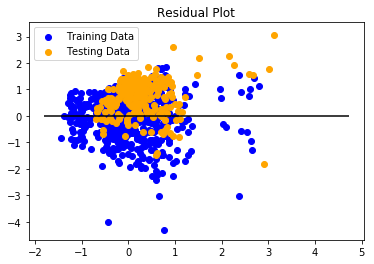

In [44]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [45]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.944383026386533, R2: -0.39899233501057263


In [46]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9058009506124618, R2: -0.3418375294194027


In [47]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9246567585218286, R2: -0.36977019021337076


In [48]:
# ElasticNet model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9125104089906406, R2: -0.35177680255422383
